# Vibrational Modeling of HCN

**IR spectroscopy** is the measurement of wavelength and intensity of the adsorption of infrared (IR) light by a sample. Following the excitation of the sample with this light a vibration of the molecule is induced. The molecule that will be explored is hydrogen cyanide (Figure 1). This compound is composed of three different atoms; thus it has three different masses. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#animate with vpython
from vpython import * #watch out for namespace conflicts

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh

# print to markdown
from IPython.display import display, Markdown, Latex

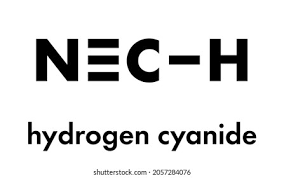
$$Figure 1: Chemical Structure of Hydrogen Cyanide$$

We can treat the bonds between each of these masses as springs, thus treating the system as three balls of masses; $n$, $m$, and $M$ connected by two springs. $k_{1}$ will represent the stiffness of the bond between $n$ and $m$ while $k_{2}$ represents the stiffness of the bond between $m$ and $M$. The equilibrium position of each ball will be $x_{equil}$, while any movement aside from the equilibrium position of each ball is its new location $x$. The displacement of the position of the ball relative to its equilibrium position is $u_{i} = x_{i}- x_{i,equil}$, where $i$ represents the atom number. Using this value of $u$ we can apply the momentum principle to build our equations to model this system. 

$$F_{net,1} = m_{1} u_{1}$$

$$F_{net,2} = m_{2} u_{2}$$

$$F_{net,3} = m_{3} u_{3}$$

Where $m_{i}$ represents the mass of each atom ($n$, $m$, and $M$) while $u_{i}$ represents the displacement relative to that atom. Note that the displacement of each mass is dependent on the frequency $\omega_n$ an amplitude $a_{i, n}$ of compound when subjected to external factors that produced vibrations. 

$$u_i(t) = a_{i,n}\cos(\omega_n t)$$

Here the first index, $i$, represents the atom number while the second index, $n$, is the normal mode. Previous work has determined there is a normal mode for each mass produced. So for $N$ masses there are $N$ normal modes. 

Once the $F$ of a spring ($k_{s}$) is substituted for each of the values, and the effects of each spring when condensed and extended as well as the position of each atom is evaluated following the derivations and basic algebra produced of which aid in our overall calculation. 


$$k_{1}a_1-k_{1}a_2 + 0 = n\omega^2a_1$$

$$-k_{1}a_1+(k_{1} + k_{2})a_2 – k_{2}a_3 = m\omega^2a_2$$

$$0-k_{2}a_2-k_{2}a_3 = M\omega^2a_3$$
In this way we can express these equations using matrices. 

$$
\left[ {\begin{array}{ccc}
   k_{1} & -k_{1} & 0 \\
   -k_{1} & k_{1} + k_{2} & -k_{2} \\
   0 & -k_{2} & k_{2} \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   n & 0 & 0 \\
   0 & m & 0 \\
   0 & 0 & M \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$

We can then define $\lambda=\omega^2$, where $\lambda$ is called the eigenvalue and $\vec{a}$ is called the eigenvector. To discover the frequencies of our system we will solve for the eigenvalues.

$$[A-\lambda B]\vec{a}=0$$ 

As mentioned previously *hydrogen cyanide*, **HCN**,  is our compound of interest. In the literature, when this compound was subjected to infrared light, the *hydrogen – carbon* bond of the compound produced a value of 3386 $cm^{-1}$ while the *carbon – nitrogen* bond produced a value of 2380 $cm^{-1}$. Using the equations above we will attempt to replicate the frequencies of HCN found in the literature. 

### Assumptions
-	The bond stiffness of chemical compounds is hard to find directly so we are initially assuming $k_{1} = 1 N/m$ and $k_{2} = 1.5 N/m$


In [ ]:
def triatomic(n,m,M):
    #properties of the system
    N = 3 #number of masses

    #properties of each mass
    L0 = 1
    k1 = 1
    k2 = 1.5

    #initial conditions that determine the initial positions of the masses
    ui = np.zeros(N) #initial displacement
    ui[0] = 1 #displace first mass
    ui[1] = 2 #displace second mass

    #Build matrices
    A=np.zeros((N,N))
    A[0,0] = k1
    A[0,1] = -k1
    A[1,0] = -k1
    A[1,1] = k1 + k2
    A[1,2] = -k2
    A[2,1] = -k2
    A[2,2] = k2
    
    B=np.identity(N)
    B[0,0] = n
    B[1,1] = m
    B[2,2] = M
   

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors, eigh returns eign values and their vec
    omegas = np.sqrt(lamb)

    print("frequencies (omega):", omegas)
    print("eigenvectors are column vectors in:\n\n", a)
    
    return omegas,a

In [ ]:
omegas,a = triatomic(1.008/6.0221E+26,12.001/6.0221E+26,14.007/6.0221E+26)

In the cells above we built our matrices based off the calculations and stored these values within our global variables, `omegas` and `a`. The masses of Hydrogen, Carbon and Nitrogen are 1.008 $g/mol$, 12.001 $g/mol$ and 14.007 $g/mol$ respectively. By dividing these values by the mass by Avagadro's Constant, we successfully convert these values for use in our code. 

The literature paper found 3386 $cm^{-1}$ and 2380 $cm^{-1}$ to be produced when subjecting the H—C bond and C—N bond to IR respectively. These values must be converted to *Hertz* to be in the proper units to compare to our experimental values. By using the equation below:

$$f = \frac{2\pi}{\omega}$$

Where $f$ is the frequency of vibrations observed and the $\omega$ represents the angular frequency, we can convert this value to $Hertz$. Note the angular frequency is equal to the stiffness over m in first mode (which we often neglect because it is so close to zero). 

When considering which bond corresponds to each $k$ value, the **electronegativity** of each atom must be considered. **Electronegativity** is the tendency for an atom of a given chemical element to attract shared electrons (or electron density) when forming a chemical bond. *Nitrogen* is more electronegative than *Carbon*, however *Hydrogen* is the least electronegative than all atoms on the periodic table. Being that *Carbon* is only two atoms away from *Nitrogen* on the periodic table (where the electrongeativity of atoms increase going up and to the right of the table), *Nitrogen* and *Carbon* are fairly close in negativity resulting a stronger bond formation between the two than the bond formed between *Carbon* and *Hydrogen*. The difference in electronegativity between neighboring atoms makes the bond between the atoms more weak, thus bonds with a large difference in electronegativity likley have a low stiffness, $k$. 


In [ ]:
#experimental omega values calculated above 
omega1 = omegas[1] #rad/sec
omega2 = omegas[2] #rad/sec

#experimental frequencies conversion to Hz
frequency1 = omega1/2*np.pi
frequency2 = omega2/2*np.pi

#literature calculations of frequencies 
wavenumber1 = 3386 #1/cm
wavenumber2 = 2380 #1/cm
flit1 = wavenumber1*100*3e8 #Hz
flit2 = wavenumber2*100*3e8 #Hz

print("\n literature frequencies (Hz):, f1={:.2e}, f2={:.2e}".format(flit1,flit2))
print("\n experimental frequencies (Hz): f1={:.2e}, f2={:.2e}".format(frequency1, frequency2))

## Exploring Values of k
Following the conversion of both our experimental omega values and the literature wavenumber values to $Hertz$, we can see the literature frequencies were found to be $1.02e14$ $Hz$ and $7.14e13$ $Hz$ while the experimental values with values of $k_{1} = 1 N/m$ and $k_{2} = 1.5 N/m$ were found to produce frequencies of $1.81e13$ $Hz$ and $4.02e13$ $Hz$. Now that we have created a code capable of producing angular frequencies and we have converted our literature values, we can now explore what values of $k$ will produce the same literature frequencies. 

We will also determine if our understanding of electronegativity will be true when if we find $k_{1}$ to be smaller than $k_{2}$. 

In [ ]:
def triatomic1(n,m,M):
    #properties of the system
    N = 3 #number of masses

    #properties of each mass
    L0 = 1
    k1 = 3.496 #N/m
    k2 = 42.89 #N/m

    #initial conditions that determine the initial positions of the masses
    ui = np.zeros(N) #initial displacement
    ui[0] = 1 #displace first mass
    ui[1] = 2 #displace second mass

    #Build matrices
    A=np.zeros((N,N))
    A[0,0] = k1
    A[0,1] = -k1
    A[1,0] = -k1
    A[1,1] = k1 + k2
    A[1,2] = -k2
    A[2,1] = -k2
    A[2,2] = k2
    
    B=np.identity(N)
    B[0,0] = n
    B[1,1] = m
    B[2,2] = M

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors, eigh returns eign values and their vec
    omegas = np.sqrt(lamb)

    print("frequencies (omega):", omegas)
    print("eigenvectors are column vectors in:\n\n", a)

    return omegas,a

In [ ]:
omegas,a = triatomic1(1.008/6.0221E+26,12.001/6.0221E+26,14.007/6.0221E+26)

In [ ]:
#experimental omega values calculated above  
omega1 = omegas[1] #rad/sec
omega2 = omegas[2] #rad/sec

#experimental frequencies being converted to Hz
frequency1 = omega1/2*np.pi
frequency2 = omega2/2*np.pi

#literature calculations of frequencies 
wavenumber1 = 3386 #1/cm
wavenumber2 = 2380 #1/cm
flit1 = wavenumber1*100*3e8 #Hz
flit2 = wavenumber2*100*3e8 #Hz

print("\n literature frequencies (Hz):, f1={:.2e}, f2={:.2e}".format(flit1,flit2))
print("\n experimental frequencies (Hz): f1={:.2e}, f2={:.2e}".format(frequency1, frequency2))

In [ ]:
N = 3
mode = 1
h = 0.01*1e-14
ttotal = 50*1e-14 #total time for calculations

#ith atom is the row
# array of times
t = np.arange(0,ttotal,h)

# build data array with all data; u[:,0] is time; other columns are u_i for each atom i
u = np.zeros((int(ttotal/h), N+1)) #this is a 2d array, (first column of u array will be in first row)

u[:,0] = np.transpose(t) #t.T <-- syntax for 2d arrays (:, all rows; 0, 0th column)

for i in range(N):
    u_atom = a[i,mode]*np.cos(omegas[mode]*t)
    u[:,i+1] = np.transpose(u_atom)[:]

# plot
plt.figure(figsize=(12,8))
plt.title("displacement of each atom")
plt.xlabel("t (s)")
plt.ylabel("$u_i$ (m)")
for i in range(N): #plot each atom
    plt.plot(u[:,0], u[:,i+1], label="{:d}".format(i+1))
plt.grid()
plt.legend()
plt.show()

## Conclusion

Our main goal was to replicate the literature frequencies of $HCN$ by building matrices to calculate the angular frequencies, $\omega$. We build a simple model to calculate these frequencies using values of $1$ and $1.5$ respectively for each value of $k$, and plugged in the masses of each molecule converted into $kg$. Following this conversion, dozens of varying ratios and values of $k_{1}$ and $k_{2}$ were tried to replicate the literature values. 

After several attempts, $k_{1} = 3.496$ $N/m$ and $k_{2} = 42.89$ $N/m$ were found to produce the literature values as seen in the cell above. Although the frequencies were not produced in the same order as the literature values, regardless of the various ratios of $k$, the second value produced was always the larger frequency value, suggesting the order of the angular frequencies produced does not align with the literature.

In all we were able to successfully replicate the literature values reported by the Chemistry Department of Purdue University. 

Vibrational Modes of Hydrogen Cyanide, https://www.chem.purdue.edu/jmol/vibs/hcn.html. 
